<a href="https://colab.research.google.com/github/lydiandiba/Hypothyroid-Test-for-Nairobi-Hospital/blob/master/Hypothyroidism_Test_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## a) Specifying the Question
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


## b) Defining the Metric for Success
Our metric for success is getting a model with the best accuracy as well as


## c) Understanding the context
Hypothyroidism is a condition in which the thyroid gland is not able to produce enough thyroid hormone. We have been given a dataset thet contains features that give us an indication whether a patient has thyroid or not.


## d) Recording the Experimental Design

I will load and read the data, understand my data, clean the data by checking for and removing outliers, missing values and duplicates. I will then perform feature engineering and create my models to find the one with the highest accuracy. Finally, evaluate my models by challenging the solution and give my conclusion.

# Reading the data

In [0]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading and reading the data
hypothyroid =  pd.read_csv("hypothyroid.csv")
hypothyroid

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


In [3]:
# looking at the shape of our dataset
hypothyroid.shape

(3163, 26)

In [4]:
# getting the statistical description of our data

hypothyroid.describe().T

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100


In [5]:
# getting the data information

hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

We can see that from our dataset information that our dataset has no missing values but from the description, we can spot several question marks in our data. 
The data types are also all strings regardless of most of our values being numerical.
We will look at these issues in our data cleaning.

# Data Cleaning

In [6]:
# Checking for null values

hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

we can see that there are no missing values, this is because of the special characters. We will replace them with NaN values so that we can analyze them.

In [0]:
# we need to replace the question marks with null values then impute them.

# Replacing the ? with missing values 

hypothyroid = hypothyroid.replace(['?'], np.nan)


In [8]:
# Checking the null values after replacing the ? with nan.

hypothyroid.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Since the missing values are quite a number. We will not drop them as they will affect the size of our dataset. We will fill in the age column with the mean ages and the sex column with the mode. 
TBG has very many missing values, we can go ahead and drop that column as well as TBG measured as the two columns are dependent on each other.

We also note that the missing values in the numerical variables come about when the corresponding measured variable reads no. We will therefore fill these with 0 under the assumption that they were not measured.

In [9]:
# changing the datatypes of our column so that we can easily use them in modelling

#Ensuring that all data is the correct data type.
def create_null(X, columns):
  for i in columns:
    X[i] = pd.to_numeric(X[i], errors='coerce')
    
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']
create_null(hypothyroid, numerical_columns)
hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          2717 non-null float64
sex                          3090 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          2695 non-null float64
T3_measured                  3163 non-null object
T3                           2468 non-nul

In [0]:
# Filling the missing values in the age column with mean

hypothyroid['age']= hypothyroid['age'].fillna(hypothyroid['age'].mean(), axis = 0)

In [0]:
# Filling the missing values in the sex column with mode

hypothyroid.sex.fillna(hypothyroid.sex.mode()[0], inplace = True)

In [0]:
# Dropping the missig values from the numerical columns

hypothyroid.dropna(how='any', subset=['TSH', 'T3','TT4','T4U','FTI'],inplace = True)

In [0]:
# Dropping the two columns that have very many missing values

hypothyroid.drop(["TBG","TBG_measured"], axis =1, inplace = True)

In [14]:
# confirming we have no missing values

hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
dtype: int64

In [15]:
# Checking for duplicates

hypothyroid.duplicated().sum()

59

we have 59 duplicates. We will go ahead and drop them

In [0]:
# dropping the duplicates

hypothyroid.drop_duplicates (inplace = True)

In [17]:
# Checking if we have dropped our duplicates

hypothyroid.duplicated().any()

False

In [18]:
hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

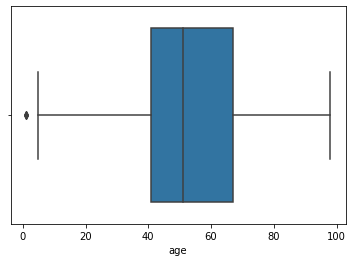

In [19]:
# Checking for outliers

sns.boxplot(x= hypothyroid['age'])

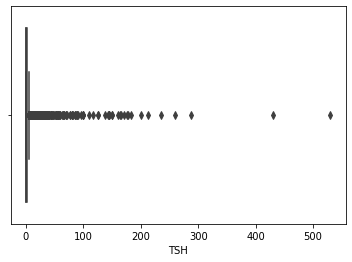

In [20]:
sns.boxplot(x= hypothyroid['TSH'])

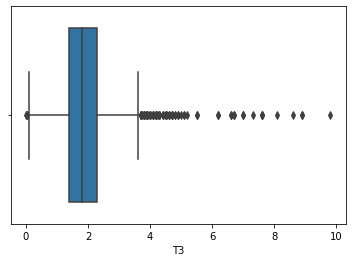

In [21]:
sns.boxplot(x= hypothyroid['T3'])

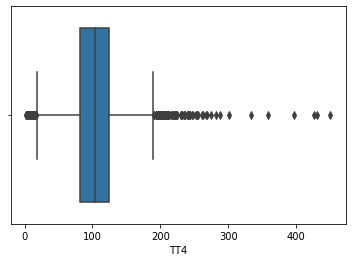

In [22]:
sns.boxplot(x= hypothyroid['TT4'])

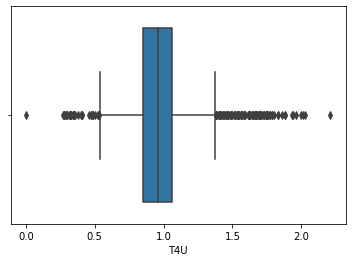

In [23]:
sns.boxplot(x= hypothyroid['T4U'])

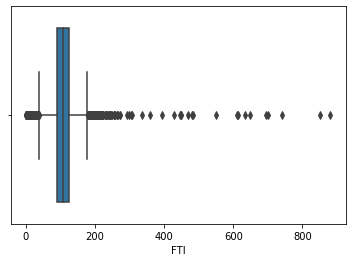

In [24]:
sns.boxplot(x= hypothyroid['FTI'])

All the numerical variables have outliers but we will not drop them. we will create our models with the variables as they are.

# Exploratory data analysis

## Univariate Analysis

In [0]:
# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(10, 8)})
# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)


Text(0.5, 0, 'status')

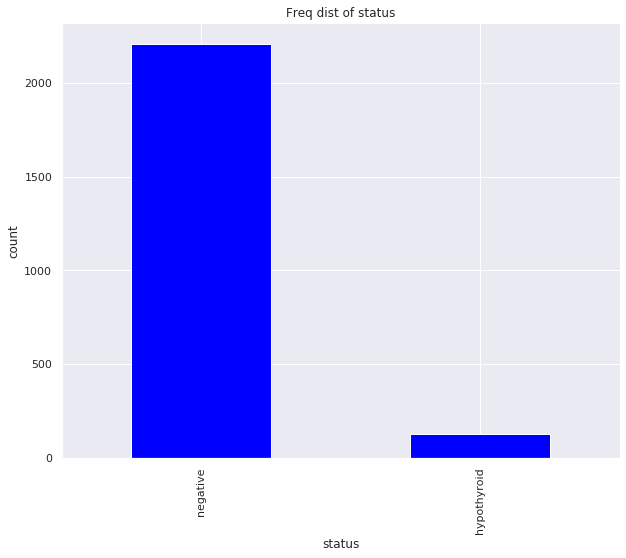

In [26]:
#Distribution of the disease status.
hypothyroid['status'].value_counts().plot.bar(title='Freq dist of status', color = 'blue')
plt.ylabel('count')
plt.xlabel('status')

This shows we have a high count for patients who tested negative for hypothyroid. This also shows that our data is positive skewed.

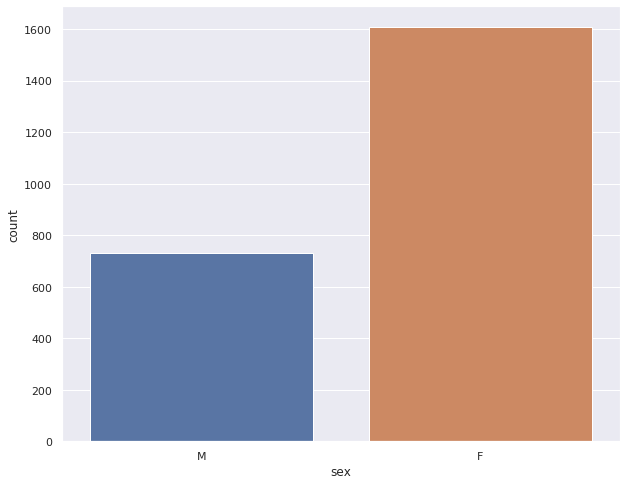

In [27]:
#sex count.

sns.set(style="darkgrid")
sns.countplot(x="sex", data=hypothyroid)

We have more females than males in our dataset. This is because hypothyroid affects more females as compared to males.

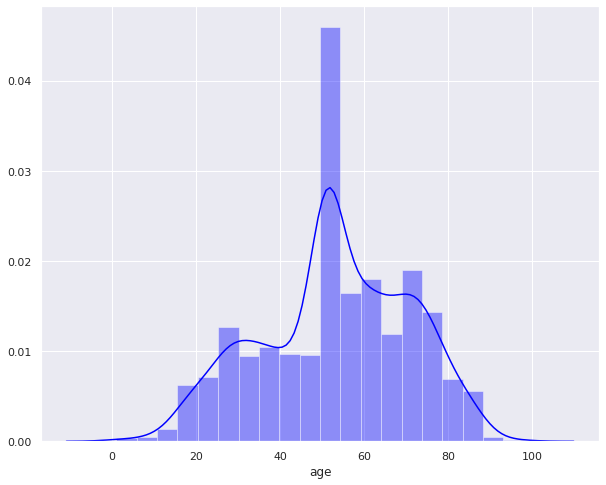

In [28]:
# age distribution

sns.distplot( hypothyroid['age'], bins=20, color = 'blue')

Most patients lie within the 50's age bracket.

## Bivariate Analysis

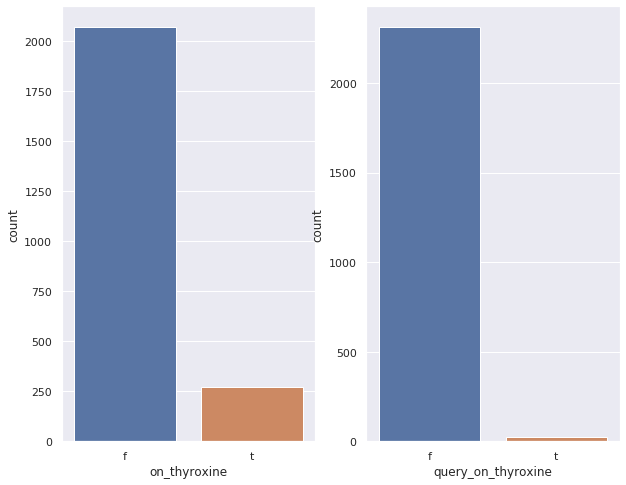

In [29]:
# count for on thyroxine and query on thyroxine

fig, ax =plt.subplots(1,2)
sns.countplot(hypothyroid['on_thyroxine'], ax=ax[0])
sns.countplot(hypothyroid['query_on_thyroxine'], ax=ax[1])
fig.show()

This shows that most people are not on thyroxine as well as almost no queries on thyroxine. This could be attributed by the fact that most patients tested negative.

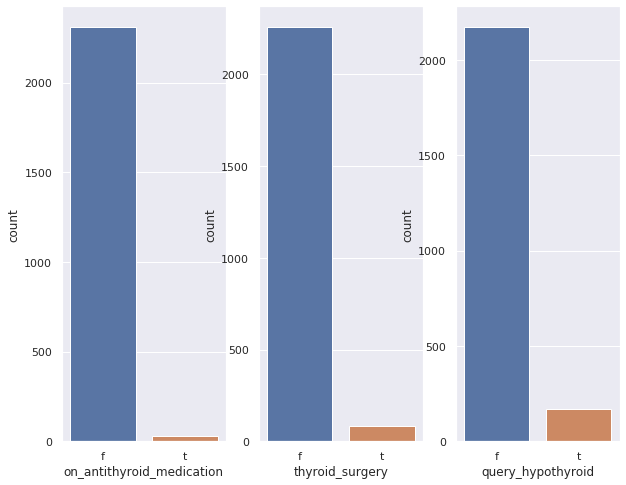

In [30]:
fig, ax =plt.subplots(1,3)
sns.countplot(hypothyroid['on_antithyroid_medication'], ax=ax[0])
sns.countplot(hypothyroid['thyroid_surgery'], ax=ax[1])
sns.countplot(hypothyroid['query_hypothyroid'], ax=ax[2])
fig.show()

This shows that most patients are not on antithyroid medication, most patients have not had thyroid surgery and also most patients have not inquired on hypothyroid.

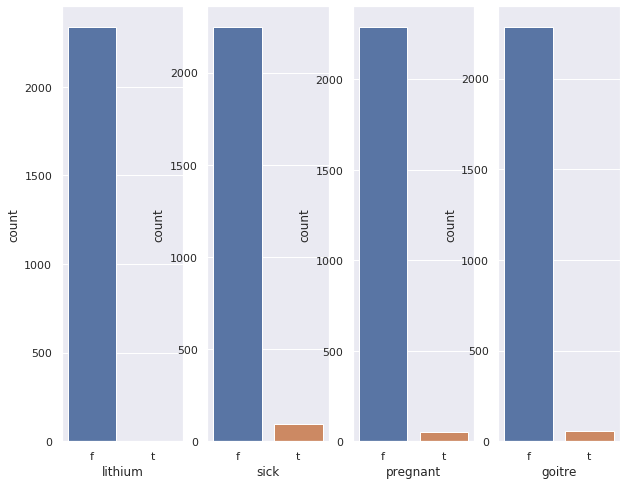

In [31]:
fig, ax =plt.subplots(1,4,)
sns.countplot(hypothyroid['lithium'], ax=ax[0])
sns.countplot(hypothyroid['sick'], ax=ax[1] )
sns.countplot(hypothyroid['pregnant'], ax=ax[2])  
sns.countplot(hypothyroid['goitre'], ax=ax[3]) 

None of the patients tested for lithium. Most patients were not sick nor pregnant and also most patients did not have goitre.

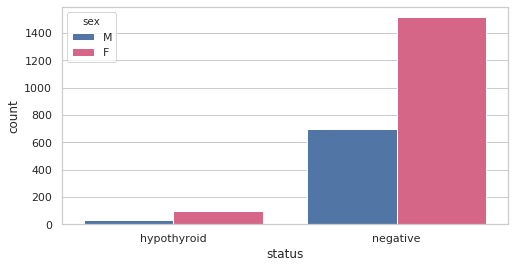

In [32]:
#Distribution os the hypothyroid disease in both genders.
#
sns.set(style="whitegrid")
colors = ["#4374B3", "#E75480"]
sns.set_palette(sns.color_palette(colors))
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(x=hypothyroid['status'], hue=hypothyroid['sex'], data=hypothyroid,orient="h", alpha=1)

We can still notice the same patern where most females tested negative compared to males. As well as those who tested positive for hypothyroid, most were females.

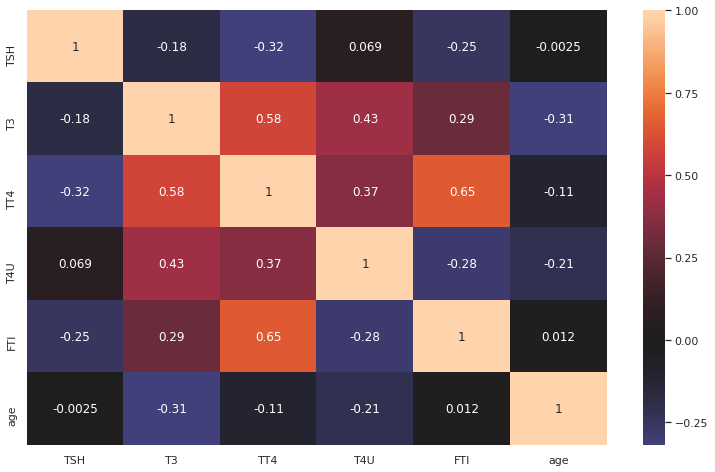

In [33]:
 #Plotting a heatmap to show correlations between variables
#
corr = hypothyroid[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap=None, annot = True, center = 0,)
plt.show()

There is some correlation between FTI and TT4  at 0.68 and between TT4 and T3 at 0.58

# Modeling

## Baseline Model
 Logistic Regression will be my baseline model since our depedent variable is categorical

In [34]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
hypothyroid['status']= label_encoder.fit_transform(hypothyroid['status']) 
  
hypothyroid['status'].unique()

array([0, 1])

In [0]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone has hyperthyroid or not, so let's use status as our Y 
y = hypothyroid['status'].values


test_features = hypothyroid.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
x = hypothyroid[test_features]

#Feature engineering.
x = pd.get_dummies(x)
X = x.values

In [36]:
# Training our Model using 70% of our data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

# Fitting our model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

# To compare the actual output values for P_test with the predicted values
# 
h = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
h



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
697,1,1
698,1,1
699,1,1
700,1,1


In [37]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[ 31,  13],
       [  1, 657]])

In [38]:
#Checking the accuracy of predictions.
#
from sklearn.metrics import confusion_matrix,accuracy_score
print( accuracy_score(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

0.98005698005698


Our baseline accuracy is 98% meaning this is a good model, but there is a slight chance of overfitting.

## Random Forest

We will now  go ahead and create other models to compare with our baseline model for the best accuracy

In [39]:
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
#fitting our training 

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.head()

,Actual,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [40]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.014245014245014245
Mean Squared Error: 0.014245014245014245
Root Mean Squared Error: 0.11935247900657214


A mean Absolute Error of 0.019 is good. Shows the model is performing pretty well.

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


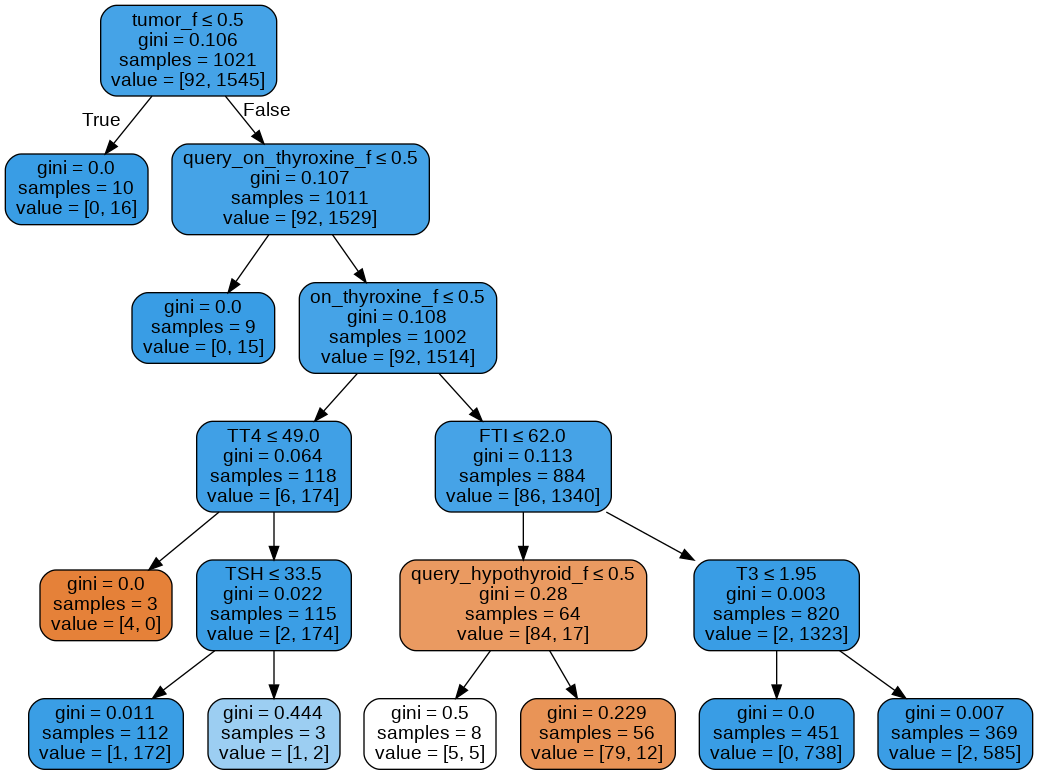

In [41]:
# Visualizing our random forest

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
 
test_features_X = x.columns.to_list()

dot_data = StringIO()

# pick a specific tree from the forest. we pick tree 35
tree = forest.estimators_[35]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = test_features_X)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid')
Image(graph.create_png())


In [42]:
# Get numerical feature importances
importance = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importance = [(feature_names, round(importance, 2)) for feature_names, importance in zip(test_features_X, importance)]

print(feature_importance) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance];

[('age', 0.0), ('TSH', 0.0), ('T3', 0.0), ('TT4', 0.05), ('T4U', 0.0), ('FTI', 0.92), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.0), ('thyroid_surgery_f', 0.0), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.02), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_y', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_y', 0.0)]

Variable: FTI                  Importance: 0.92
Variable: TT4                  Importance: 0.05
Variable: query_hypothyroid_f  Importance: 0.02
Variable: age                  Importance: 0.0
Variable:

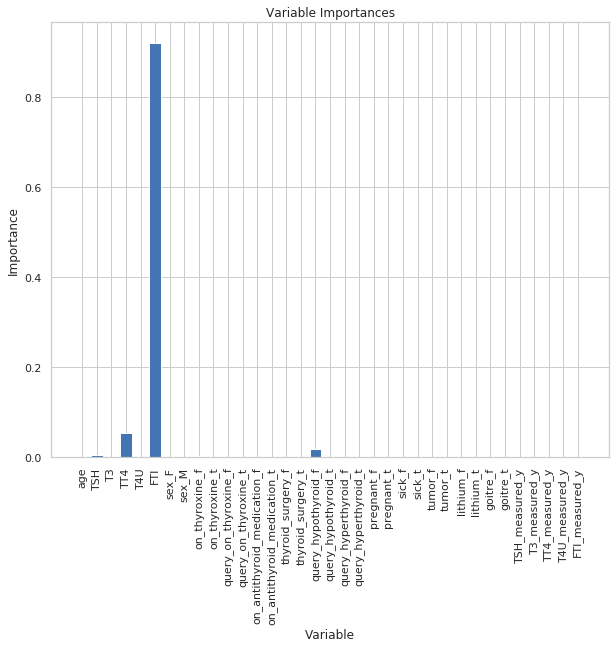

In [43]:
# Representing the feature importance visually

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importance)))
# Make a bar chart
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features_X, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


The features with the highest importance are FTI, TSH, on antithyroid medication and query hypothyroid.

In [47]:
# Checking accuracy

#print( accuracy_score(y_test, y_pred.round()))
print( accuracy_score(y_test, y_pred))

0.9857549857549858


Random Forest Accuracy is 98.5%

## Adaboost

In [0]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor


# Note that adaboost needs a simple decision tree in its constructor. 
ada_boost = AdaBoostRegressor(RandomForestRegressor(max_depth=5),
                          n_estimators=300, random_state=10)

ada_boost = ada_boost.fit(X_train, y_train)

#making predictions
y_pred_ada = ada_boost.predict(X_test)
# y_pred= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# y_pred



In [84]:
# Assessing the errors

a = metrics.mean_absolute_error(y_test, y_pred_ada)
print('Mean Absolute Error:' + str(a))
b = metrics.mean_squared_error(y_test, y_pred_ada) 
print('Mean Squared Error:' + str(b))  
c = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)) 
print('Root Mean Squared Error:' + str(c))


Mean Absolute Error:0.04029324593435684
Mean Squared Error:0.01202749380054424
Root Mean Squared Error:0.10966993115956734


In [87]:
# Checking accuracy

print( accuracy_score(y_test, y_pred_ada.round()))
#print( accuracy_score(y_test, y_pred_ada))

0.99002849002849


In [88]:
#Hyperparameter tuning
#
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 300],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist, 
 cv=3,
 n_iter = 10,
 n_jobs=-1, random_state = 42)

pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 300]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [89]:
# getting the best parameters

pre_gs_inst.best_params_

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}

Now we fit our ada boost using the parameters we got from hyperparameter tuning



In [0]:
#Fitting adaboost regressor

from sklearn.ensemble import AdaBoostRegressor
ada_boost = AdaBoostRegressor(RandomForestRegressor(max_depth=6),
                          n_estimators=50, random_state=42, learning_rate = 0.01, loss= 'linear' )

ada_boost = ada_boost.fit(X_train, y_train)

In [95]:
#Making predictions
#
y_pred_ada1 = ada_boost.predict(X_test)
ada = pd.DataFrame({'actual': y_test, 'predicted': y_pred_ada1})
ada.head()

,actual,predicted
0,1,1.000000
1,1,1.000000
2,0,0.015747
3,1,1.000000
4,1,1.000000


In [96]:
# Assessing the errors

a = metrics.mean_absolute_error(y_test, y_pred_ada1)
print('Mean Absolute Error:' + str(a))
b = metrics.mean_squared_error(y_test, y_pred_ada1) 
print('Mean Squared Error:' + str(b))  
c = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada1)) 
print('Root Mean Squared Error:' + str(c))

Mean Absolute Error:0.019003770596568104
Mean Squared Error:0.009122889925528245
Root Mean Squared Error:0.09551382059957735


In [97]:
# Checking accuracy

print( accuracy_score(y_test, y_pred_ada1.round()))
#print( accuracy_score(y_test, y_pred_ada))

0.99002849002849


## Gradient Boosting

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor()
gbr = gbr.fit(X_train, y_train)

#Making predictions
#
y_pred_gbr = gbr.predict(X_test)
D = pd.DataFrame({'actual': y_test, 'predicted': y_pred_gbr})
D.head()

,actual,predicted
0,1,0.999663
1,1,1.000557
2,0,0.021524
3,1,0.999953
4,1,0.999937


In [99]:
# Assessing the errors

d = metrics.mean_absolute_error(y_test, y_pred_ada)
print('Mean Absolute Error:' + str(d))
e = metrics.mean_squared_error(y_test, y_pred_ada) 
print('Mean Squared Error:' + str(e))  
f = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)) 
print('Root Mean Squared Error:' + str(f))

Mean Absolute Error:0.019003770596568104
Mean Squared Error:0.009122889925528245
Root Mean Squared Error:0.09551382059957735


In [100]:
# Checking accuracy

print( accuracy_score(y_test, y_pred_gbr.round()))
#print( accuracy_score(y_test, y_pred_ada))

0.9871794871794872


In [101]:
# Hyperparameter tuning for gradient boost

param_dist = {
 'n_estimators': [50, 300],
 'learning_rate' :[0.01,0.05,0.1,0.3,1],
 'max_depth': [1,2,3,4,5,6,7,8,9,10]
 }

pre_gbr_inst = RandomizedSearchCV(GradientBoostingRegressor(),
 param_distributions = param_dist,
 cv=6,
 n_iter = 10,
 n_jobs=-1, random_state = 25)

pre_gbr_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [102]:
# getting the best parameters

pre_gbr_inst.best_params_


{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300}

Now we use the parameters we got from our hyperparameter tuning to see how it affects the model.

In [104]:
# training the model with Gboost
#
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=3)
gbr = gbr.fit(X_train, y_train)

#Making predictions
#
y_pred_gbr1 = gbr.predict(X_test)
gb_pred = pd.DataFrame({'actual': y_test, 'predicted': y_pred_gbr1})
gb_pred.head()

,actual,predicted
0,1,0.999459
1,1,0.999146
2,0,0.011662
3,1,0.999875
4,1,0.999922


In [105]:
#  Assessing the errors

d = metrics.mean_absolute_error(y_test, y_pred_gbr1)
print('Mean Absolute Error:' + str(d))
e = metrics.mean_squared_error(y_test, y_pred_gbr1) 
print('Mean Squared Error:' + str(e))  
f = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr1)) 
print('Root Mean Squared Error:' + str(f))

Mean Absolute Error:0.022491240459696495
Mean Squared Error:0.011241201361431469
Root Mean Squared Error:0.10602453188499097


In [106]:
# Checking accuracy

print( accuracy_score(y_test, y_pred_gbr1.round()))
#print( accuracy_score(y_test, y_pred_ada))

0.9871794871794872


## Support Vector Machine

In [0]:
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score

Using Linear kernel

In [70]:
# Fitting the model, making predictions and evaluating the model
# Fit the model
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

# making prediction
y_pred = model.predict(X_test)


# getting the accuracy of the model
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9786324786324786
0.9887808526551981
[[ 26  13]
 [  2 661]]


Linear kernel accuracy is 97.9%

Using Polynomial Kernel

In [81]:
# Fitting the model, making predictions and evaluating the model

# Building the model 

polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')

# Training the model using the training set

polyclassifier.fit(X_train, y_train)


# making prediction
y_pred1 = polyclassifier.predict(X_test)


# getting the accuracy of the model

print(accuracy_score(y_test, y_pred1))
print(f1_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.9629629629629629
0.9807407407407407
[[ 14  25]
 [  1 662]]


Polynomial kernel accuracy is 96.3%

Using rbf kernel

In [82]:
#Fitting the model, making predictions and evaluating the model

# Building the model 

rbfclassifier = SVC(kernel='rbf')

# Training the model using the training set

rbfclassifier.fit(X_train, y_train)

# making prediction
y_pred2 = rbfclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred2))
# Measuring the accuracy of the model
print(f1_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.98005698005698
0.9895052473763118
[[ 28  11]
 [  3 660]]


rbf kernel accuracy score is 98%

In [0]:
# Hyperparameter tuning for SVM Using all the kernels

# Creating a dictionary of parameters to tune

param_grid = {'C': (0.001, 0.01, 0.1, 1, 10),
              'kernel': ('linear', 'poly', 'rbf'),
              'class_weight': ('balanced', None),
              'gamma' : ('scale', 'auto'),
              'shrinking': (True, False)}

grid_search = GridSearchCV(SVC(gamma='scale'), param_grid, cv=5)

In [0]:
grid_search.fit(X,y)
print (grid_search.best_params_)
abs(grid_search.best_score_)

In [0]:
grid_results = grid_search.fit(X_train, y_train)

print(grid_results.best_score_)
print(grid_results.best_estimator_)
print(grid_results.best_params_)

In [77]:
svm_model = SVC(random_state = 42, C = 10, class_weight = 'balanced', gamma = 'scale', kernel = 'poly', shrinking = True, )
# Train the model using the training set
#
svm_model.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
# Creating a dictionary of parameters to tune
#
params = {'C': np.arange(1, 102, 10),
         'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')

search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# Selecting the independent variables and the target variable
#
X = hypothyroid[['FTI', 'TSH']]
y = np.where(hypothyroid.status == 'hypothyroid', 1, 0)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

# Challenging the Solution

We could use other models like sigmoid to get the accuracies for comparison. 

# Conclusion

From the random forest models, the best model we could use is gradient boost with an accuracy of 98.7%

For support Vector Machine, rbf kernel gave us the best accuracy with 98% accuracy..